In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


KeyboardInterrupt: 

In [29]:
df = sklearn.datasets.fetch_california_housing()

In [28]:
fmnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

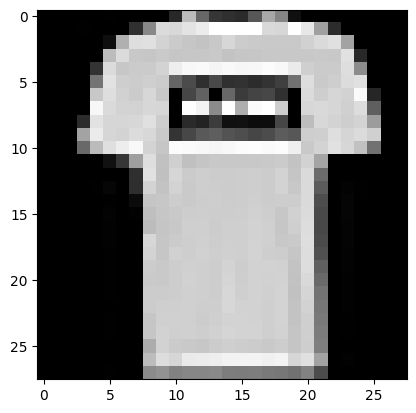

In [7]:
plt.imshow(x_train[1], cmap='gray')

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 100)               7600      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 94685 (369.86 KB)
Trainable params: 94685 (369.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics="accuracy")

In [12]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15, shuffle=True)

Epoch 1/50
1594/1594 [==============================] - 12s 7ms/step - loss: 0.7993 - accuracy: 0.7295 - val_loss: 0.5851 - val_accuracy: 0.7853
Epoch 2/50
1594/1594 [==============================] - 12s 7ms/step - loss: 0.5021 - accuracy: 0.8232 - val_loss: 0.5070 - val_accuracy: 0.8152
Epoch 3/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4508 - accuracy: 0.8398 - val_loss: 0.4513 - val_accuracy: 0.8408
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4210 - accuracy: 0.8496 - val_loss: 0.4235 - val_accuracy: 0.8508
Epoch 5/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3960 - accuracy: 0.8581 - val_loss: 0.4258 - val_accuracy: 0.8469
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3795 - accuracy: 0.8639 - val_loss: 0.4070 - val_accuracy: 0.8502
Epoch 7/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3650 - accuracy: 0.8683 - val_loss: 0.3796 - val_accurac

In [13]:
history.history

{'loss': [0.7993221282958984,
  0.5021352767944336,
  0.4507584273815155,
  0.4209825098514557,
  0.395952045917511,
  0.3795059621334076,
  0.3649558126926422,
  0.3538403809070587,
  0.34278494119644165,
  0.33274391293525696,
  0.3239901065826416,
  0.31747886538505554,
  0.31053271889686584,
  0.30199313163757324,
  0.2970091998577118,
  0.29161062836647034,
  0.28611236810684204,
  0.2804149091243744,
  0.2766379415988922,
  0.27062588930130005,
  0.2669637203216553,
  0.2616021931171417,
  0.25790849328041077,
  0.25311538577079773,
  0.24992965161800385,
  0.24639761447906494,
  0.24312320351600647,
  0.23959027230739594,
  0.23620779812335968,
  0.23308856785297394,
  0.23094740509986877,
  0.22567665576934814,
  0.22285431623458862,
  0.22040605545043945,
  0.21707704663276672,
  0.21380719542503357,
  0.21234025061130524,
  0.2077893614768982,
  0.20505352318286896,
  0.2030339241027832,
  0.20013490319252014,
  0.19801311194896698,
  0.19566231966018677,
  0.1922581195831298

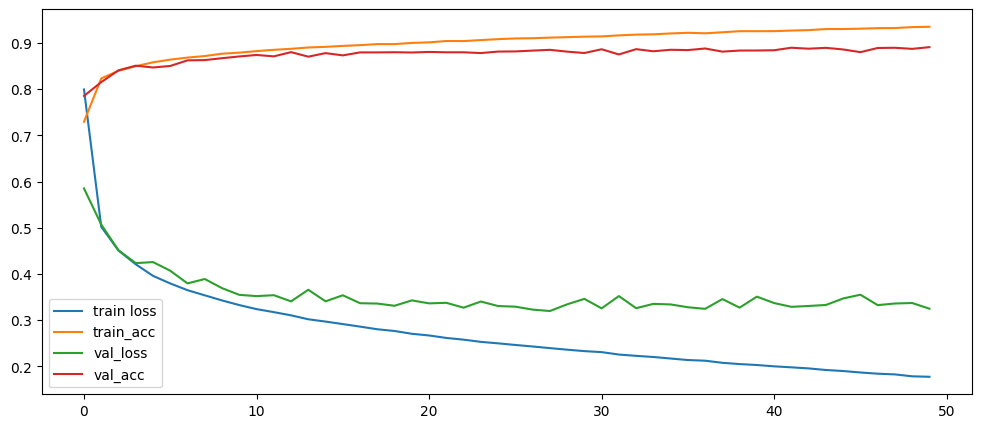

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label="train loss")
ax.plot(history.history['accuracy'], label="train_acc")
ax.plot(history.history['val_loss'], label="val_loss")
ax.plot(history.history['val_accuracy'], label="val_acc")
ax.legend()

In [15]:
model.evaluate(x_test, y_test, verbose=0)

[0.3538241982460022, 0.8838000297546387]

In [16]:
x3 = x_test[1:3,:,:]

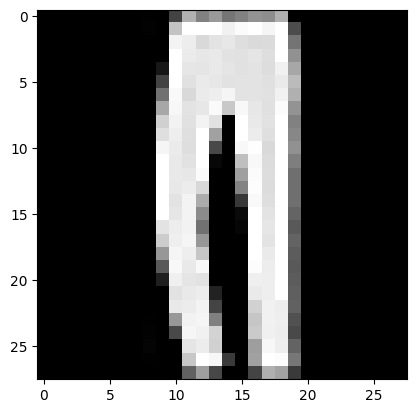

In [17]:
plt.imshow(x3[1], cmap="gray")

In [20]:
model.predict(x3)

1/1 [==============================] - 0s 149ms/step


array([[1.38679123e-03, 7.50137105e-12, 9.97566462e-01, 9.98775992e-11,
        4.41154669e-04, 4.13839210e-13, 6.05710782e-04, 8.18620727e-11,
        1.59622437e-11, 1.58037250e-10],
       [1.87057303e-09, 1.00000000e+00, 3.93406141e-12, 3.38950290e-09,
        4.88560130e-11, 2.30460506e-19, 3.67055608e-10, 6.76153334e-14,
        1.48367386e-12, 1.03564035e-13]], dtype=float32)

In [22]:
np.argmax(model.predict(x3), axis=1)

1/1 [==============================] - 0s 23ms/step


array([2, 1])

#regression

In [31]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [34]:
x_train0, x_test, y_train0, y_test = train_test_split(df["data"], df["target"], test_size=0.2, random_state=42)

In [35]:
x_train1, x_val, y_train1, y_val = train_test_split(x_train0, y_train0, test_size=0.2, random_state=42)

In [36]:
x_test.shape

(4128, 8)

In [38]:
scaler = StandardScaler()

In [40]:
x_train_sc = scaler.fit_transform(x_train1)

In [41]:
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

In [58]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(50, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(50, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(50, activation="relu"))
model1.add(keras.layers.Dense(1))

In [59]:
model1.compile(loss="mean_squared_error",
               optimizer="sgd",
               metrics=["mean_absolute_error"])

In [60]:
history1 = model1.fit(x_train_sc, y_train1, epochs=50, validation_data=(x_val_s, y_val))

Epoch 1/50
413/413 [==============================] - 2s 4ms/step - loss: 0.7871 - mean_absolute_error: 0.6300 - val_loss: 0.5479 - val_mean_absolute_error: 0.5232
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 0.4464 - mean_absolute_error: 0.4800 - val_loss: 0.4462 - val_mean_absolute_error: 0.4661
Epoch 3/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3947 - mean_absolute_error: 0.4473 - val_loss: 0.4405 - val_mean_absolute_error: 0.4899
Epoch 4/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3681 - mean_absolute_error: 0.4306 - val_loss: 0.3954 - val_mean_absolute_error: 0.4478
Epoch 5/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3568 - mean_absolute_error: 0.4222 - val_loss: 0.3719 - val_mean_absolute_error: 0.4295
Epoch 6/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3436 - mean_absolute_error: 0.4141 - val_loss: 0.3668 - val_mean_absolute_error: 0.4283
Epoch 7/50
413/4

In [63]:
model1.evaluate(x_test_s, y_test, verbose=1)

129/129 [==============================] - 0s 3ms/step - loss: 0.2896 - mean_absolute_error: 0.3543


[0.2896074652671814, 0.3542535901069641]

SyntaxError: invalid syntax (<ipython-input-65-2b99b2e34f45>, line 1)